Existe discurso de ódio nos tweets? Como podemos saber?

Se considerarmos que um discurso assim é racista ou sexista nossa tarefa fica mais clara: queremos saber entre todos os tweets quais deles são racistas ou sexistas.

Como podemos fazer isso? Vamos considerar que um tweet com discurso de ódio vale 1 e sem esse discurso 0.

Qual o primeiro passo para classificarmos tweets? Ter tweets, certo? Então:

# Obtenção dos dados

In [0]:
import pandas as pd

tweets_treino = pd.read_csv('https://raw.githubusercontent.com/cassiasamp/secomp/master/dados/train_tweets.csv')
tweets_teste = pd.read_csv('https://raw.githubusercontent.com/cassiasamp/secomp/master/dados/test_tweets.csv')

# Exploraçao dos dados

In [0]:
tweets_treino.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Vemos que os dados de treino tem 3 colunas, id, um número para identificação, label, são as nossas identificações ou marcações e o texto do tweet, em tweet.

In [0]:
tweets_teste.head(5)

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


Podemos dar uma olhada também em quais as quantidades de treino e teste.

In [0]:
len(tweets_treino)

31962

In [0]:
len(tweets_teste)

17197

In [0]:
total_tweets = len(tweets_treino) + len(tweets_teste)

In [0]:
len(tweets_teste)/total_tweets*100

34.98240403588356

In [0]:
len(tweets_treino)/total_tweets*100

65.01759596411644

Repare que vamos treinar com aprox. 65% dos dados e testar com 35%. 

Agora vamos focar nos tweets de treino, o que mais conseguimos entender deles?

In [0]:
tweets_treino.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Sabemos quem foi que escreveu o tweet? Não, certo? Repare que eles anonimizam as pessoas com @user. Mas isso nos dá algum tipo deinfo para resolver o nosso problema? Não, então o que podemos fazer?

Vamos pensar. Se você tem um quarto ou sala que sempre está uma bagunça e um dia está com pressa para sair e quer encontrar o celular, eu te pergunto, é mais fácil achar esse celular se o quarto estiver arrumado ou bagunçado? Se ele estiver arrumado, certo? Com os nossos textos é a mesma coisa.

Se repararmos nesse @user aí ele não adiciona nada, então podemos arrumar esse quarto e nos livrarmos dele.

# Preprocessamento e limpeza dos tweets

Precisamos saber onde está o @ e tirá=lo de lá. Para isso vou chamar o @ do padrao que estamos procurando. E ai para dar match nesse padrão, vamos usar uma expressão regular.

## Removendo @user

In [0]:
import re 

padrao = '@'
arrobas = re.findall(padrao, str(tweets_treino))

Além da expressão vamos também substituir, re.sub, o arroba nos tweets por nada '', uma string vazia.

In [0]:
for arroba in arrobas:
  treino_arrumado = re.sub(arroba, ' ', str(tweets_treino))

In [0]:
treino_arrumado

"          id  label                                              tweet\n0          1      0    user when a father is dysfunctional and is s...\n1          2      0   user  user thanks for #lyft credit i can't us...\n2          3      0                                bihday your majesty\n3          4      0  #model   i love u take with u all the time in ...\n4          5      0             factsguide: society now    #motivation\n5          6      0  [2/2] huge fan fare and big talking before the...\n6          7      0    user camping tomorrow  user  user  user  use...\n7          8      0  the next school year is the year for exams.ð\x9f\x98...\n8          9      0  we won!!! love the land!!! #allin #cavs #champ...\n9         10      0    user  user welcome here !  i'm   it's so #gr...\n10        11      0   â\x86\x9d #ireland consumer price index (mom) climb...\n11        12      0  we are so selfish. #orlando #standwithorlando ...\n12        13      0  i get to see my daddy today!! 

Funcionou! Podemos aproveitar e fazer isso nos dois datasets juntos.

In [0]:
dados = tweets_treino.append(tweets_teste, ignore_index=True) #ignore_index porque eu quero manter o índice que já tenho

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [0]:
import numpy as np

Exemplo com soma e subtração:

In [0]:
def subtrai_maior_soma_menor(entrada_1, entrada_2):
  
    if entrada_1 > entrada_2:
        return entrada_1 - entrada_2
    else:
        return entrada_1 + entrada_2

In [0]:
vetorizacao = np.vectorize(subtrai_maior_soma_menor)

In [0]:
entrada_1 = [1, 2, 3, 4]
entrada_2 = [2]
subtrai_maior_soma_menor(entrada_1, entrada_2)

[1, 2, 3, 4, 2]

Vamos voltar para os tweets. Queremos chamar a função que achar o regex e o substitui. Vamos montar essa função.

In [0]:
def tchau_padrao(texto, padrao):
  
  padroes_encontrados = re.findall(padrao, texto)
  
  for um_padrao in padroes_encontrados:
    texto = re.sub(um_padrao, ' ', texto)
    
  return texto

Como vamos fazer uma transformação num grande volume de dados, vamos usar np.vectorize para aplicar essa função nos nossos dados como de uma vez só ao invés de ela rodar 49.000 vezes.

In [0]:
# \w busca global pelo caractere 
# * = com uma ou mais ocorrências

expressao_regular = "@[\w]*"

# vou aproveitar e criar uma coluna de tweet arrumado, em en, tidy tweet
dados['tidy_tweet'] = np.vectorize(tchau_padrao)(dados['tweet'], expressao_regular)

Vamos dar uma olhada nos nosso dados para ver se funcionou.

In [0]:
dados.head(7)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦


Beleza, funcionou. Agora já não temos mais @user nos nossos tweets.

## Removendo caracteres especiais

Repare também que se olharmos para esses dois pontos aqui, um ponto, virgula, caracter especial ou número sabemos algo sobre a classificação que queremos fazer? Não, né. Repare que pontos, virgulas, números e caracteres especiais não são expressivos sobre o sentimento do nosso texto, então são considerados ruídos e precisamos limpar o nosso texto também desses ruídos.


In [0]:
# todos os pontos, virgulas e caracteres especiais
expressao_regular_2 = "[^a-zA-Z#]"

dados['tidy_tweet'] = dados['tidy_tweet'].str.replace(expressao_regular_2, ' ')

In [0]:
dados.head(15)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [0]:
#caso eu tenha problemas dislexicos
#dados.drop(columns=['tidy tweets', 'tidy tweet'])

Será que já acabamos? Repare também que podemos ter interjeições como ahm, hum, hmm e essas palavras ajudam a gente a saber o sentimento? Também só acrescentam ruído. Logo, vamos filtrá-las. 

## Removendo palavras curtas

Palavras assim são chamadas de stop words (palavras de parada).

Para filtrá-las vamos usar algo que se chama lambda. E funciona mais ou menos assim:

In [0]:
lambda x : x

<function __main__.<lambda>>

In [0]:
(lambda x : x)(1)

1

In [0]:
(lambda x : x*5)(1)

5

Vamos combinar a nossa lambda com a divisao split dos dados em palavras, sua posterior junção com join e a verificação de se a palavra é curta, até 3 caracteres.

In [0]:
dados['tidy_tweet'] = dados['tidy_tweet'].apply(lambda x: ' '.join([palavra for palavra in x.split() if len(palavra)>3]))

In [0]:
(lambda x: ' '.join([word for word in x.split() if len(word)>3]))('exemplo basta eu escrever algo até três caracteres e a lambda vai ter excluido')

'exemplo basta escrever algo três caracteres lambda excluido'

### Cuidado ao usar lambdas

Uma nota sobre lambdas que são conhecidas também como funções anônimas, se puder evitá-las, evite, pois melhor a leitura do código. É que nesse caso limpeza de dados é a parte mais dolorosa do processo O.O', estamos quase acabando.

jà olhamos para coisas do conjunto dos tweets como pontos e virgulas, caracteres especiais e começamos a olhar para as palavras com o tamanho delas. Podemos nos atentar bem mais para as palavras agora. Se você vai entender um texto, é mais fácil se alguémfalareletodomuitorápidopravocê? Ou se você  for  ouvindo  palavra  por  palavra  de va ga ri nho? O segundo né? O que podemos fazer que é parecido com isso e nos permite mexer mais no texto e dividir os tweets em suas menores unidades, palavras ou tokens..

Isso também é chamado de tokenização.

In [0]:
tweet_tokenizado = dados['tidy_tweet'].apply(lambda x: x.split())
tweet_tokenizado.head(25)

0     [when, father, dysfunctional, selfish, drags, ...
1     [thanks, #lyft, credit, cause, they, offer, wh...
2                               [bihday, your, majesty]
3                      [#model, love, take, with, time]
4                    [factsguide, society, #motivation]
5     [huge, fare, talking, before, they, leave, cha...
6                            [camping, tomorrow, danny]
7     [next, school, year, year, exams, think, about...
8     [love, land, #allin, #cavs, #champions, #cleve...
9                                       [welcome, here]
10    [#ireland, consumer, price, index, climbed, fr...
11    [selfish, #orlando, #standwithorlando, #pulses...
12                    [daddy, today, days, #gettingfed]
13    [#cnn, calls, #michigan, middle, school, build...
14    [comment, #australia, #opkillingbay, #seasheph...
15    [ouch, junior, angry, #got, #junior, #yugyoem,...
16      [thankful, having, paner, #thankful, #positive]
17                                     [retweet,

Ao fazermos isso, podemos agora olhar mais para as palavras individuais.

Olhando para os nossos tweets, podemos simplificar ainda mais.Veja que palavras como thanks, thank, thankful tem todas uma origem parecida, podemos ao invés de tentar entendê-las assim, deixá-las nessa origem, tirando os seus sufixos. Esse processo se chama estematização ou stemming.

## Normalizando as palavras

Para isso, vamos usar uma lib especializada em manipulação de linguagem que é o nltk e o seu originador ou stemmer.

In [0]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

In [0]:
tweet_tokenizado = tweet_tokenizado.apply(lambda x: [stemmer.stem(palavra) for palavra in x]) # stematização
tweet_tokenizado.head(25)

0     [when, father, dysfunct, selfish, drag, kid, i...
1     [thank, #lyft, credit, caus, they, offer, whee...
2                               [bihday, your, majesti]
3                      [#model, love, take, with, time]
4                          [factsguid, societi, #motiv]
5     [huge, fare, talk, befor, they, leav, chao, di...
6                               [camp, tomorrow, danni]
7     [next, school, year, year, exam, think, about,...
8     [love, land, #allin, #cav, #champion, #clevela...
9                                        [welcom, here]
10    [#ireland, consum, price, index, climb, from, ...
11    [selfish, #orlando, #standwithorlando, #pulses...
12                       [daddi, today, day, #gettingf]
13    [#cnn, call, #michigan, middl, school, build, ...
14    [comment, #australia, #opkillingbay, #seasheph...
15    [ouch, junior, angri, #got, #junior, #yugyoem,...
16                 [thank, have, paner, #thank, #posit]
17                                      [retweet

Repare que agora as palavras estão no 'singular' e sem declinações.

Agora, vamos reunir esses tokens para formarmos frases novamente e voltá-los para os nossos dados.

In [0]:
for token in range(len(tweet_tokenizado)):
    tweet_tokenizado[token] = ' '.join(tweet_tokenizado[token])

In [0]:
dados['tidy_tweet'] = tweet_tokenizado

In [0]:
dados.head(5)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# Perguntas e visualizações

Agora que estamos mais íntimos dos nossos dados, podemos começar a tentar responder algumas perguntas.

* Quais são as palavras mais comuns no dataset?
* Quais são as palavras que mais ocorrem em tweets negativos e em tweets positivos?
* Quantas hashtags tem em um tweet?
* Que tendências eu tenho no meu dataset?
* Será que tem alguma tendência associada com os sentimentos? Será que a tendência e os sentimento são compatíveis?

## Entendendo quais são as palavras mais usadas com word cloud

Primeiro vamos juntar nossas palavras de novo.

In [0]:
todas_as_palavras = ' '.join([texto for texto in dados['tidy_tweet']])

In [0]:
todas_as_palavras

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

Agora podemos criar o word cloud.

In [0]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110,).generate(todas_as_palavras) #background_color="white").generate(todas_as_palavras)

In [0]:
wordcloud

Vamos plota-lo/ ebibi-lo com matplotlib.

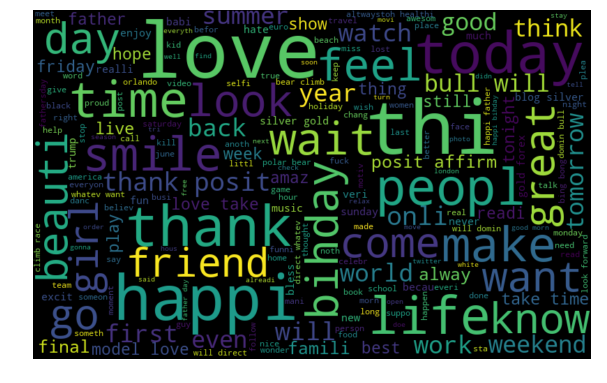

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Como nossos dados possuel labels (que foram feitas manualmente) podemos fazer uma wordcloud só para sentimentos positvos ou 0 e outra para coisas complicadas ou 1.

## Wordcloud positiva

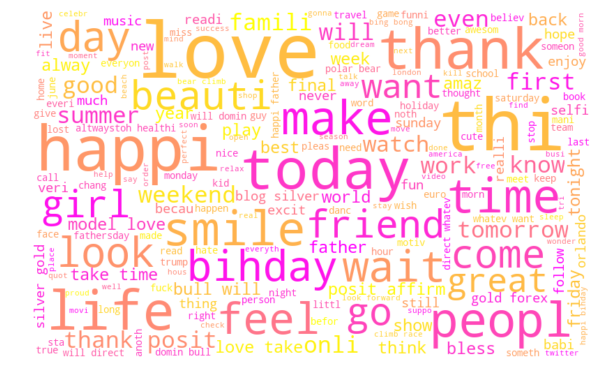

In [0]:
palavras_normais =' '.join([texto for texto in dados['tidy_tweet'][dados['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110, background_color="white", colormap='spring').generate(palavras_normais)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Wordcloud complicada

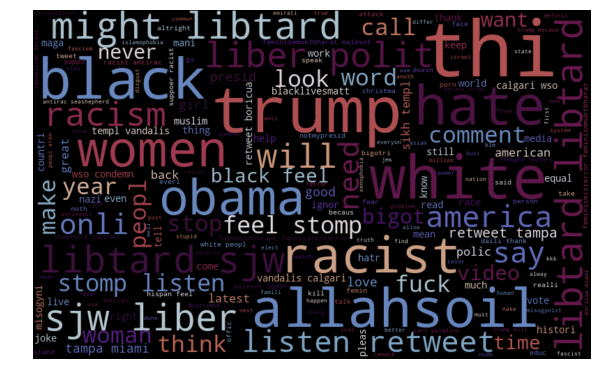

In [0]:
palavras_complicadas =' '.join([texto for texto in dados['tidy_tweet'][dados['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110, colormap='twilight').generate(palavras_complicadas)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Podemos perceber com essas visualizações que as duas wordclous fazem sentido, então temos bons dados para trabalharmos.

## Analisando hastags

O que mais é impactante no twitter? Geralmente temos trending topics e eles acontecem devido as hashtags. Como será que as hashtags estão distribuidas no nosso caso?
 
 Para analisarmos as hashtags precisamos te-las, Como fazemos isso? Com regex

In [0]:
# identificando as palavras com hashtags com regex
# #(\w+) padrão: catacter que queremos encontrar(palavra que queremos fazer match)

exemplo_hash = '#model, love, #hello'
exemplo_hash2 = ['#model, love, take, with, #time', '#oi']

In [0]:
re.findall(r"#(\w+)", exemplo_hash)

['model', 'hello']

Agora que já testamos e sabemos que funciona, vamos fazer uma função para extrair as hashtags

In [0]:
for tweet in exemplo_hash2:
  print(tweet)
  hts = re.findall(r"#(\w+)", tweet)
hts

#model, love, take, with, #time
#oi


['oi']

Repare que estamos pegando só o último, para termos todas as palavras, vamos guardá-las em uma lista com append

In [0]:
def pegar_hashtags(tweet):
    hashtags = []
    for palavra in tweet:
        hts = re.findall(r"#(\w+)", palavra)
        hashtags.append(hts)

    return hashtags

Vamos extrair nossas hashtags cujo sentiment é ok primeiro. Como sabemos que o sentimento é ok? Quando a label é 0, podemos fazer esse teste dentro do próprio dataframe. Vou pegar os 5 primeiros tweets cuja label é 0.

In [0]:
dados[:5]['label'] == 0
# ou dados[:5].label == 0 para quem preferir

0    True
1    True
2    True
3    True
4    True
Name: label, dtype: bool

In [0]:
dados[:5]['tidy_tweet'][dados['label'] == 0]

0    when father dysfunct selfish drag kid into dys...
1    thank #lyft credit caus they offer wheelchair ...
2                                  bihday your majesti
3                           #model love take with time
4                             factsguid societi #motiv
Name: tidy_tweet, dtype: object

Vamos assigna-los para hts_regulares para analisarmos depois

In [0]:
hts_regulares = pegar_hashtags(dados['tidy_tweet'][dados['label'] == 0])
hts_regulares[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

Agora o mesmo para os complicados...

In [0]:
hts_complicados = pegar_hashtags(dados['tidy_tweet'][dados['label'] == 1])

Repare que as nossas listas se tornaram listas de listas, como queremos só as palavras, temos um truque para voltarmos para uma lista só que é somando duas listas. Vamos somar a nossa com uma lista vazia para fazer esse des ecadeamento.

In [0]:
# desencadeando lista
hts_regulares = sum(hts_regulares,[])
hts_complicados = sum(hts_complicados,[])

## Contando a frequencia das hashs com NLTK

Temos todas as nossas hashtags, agora podemos analisa-las, então vamos fazer um gráfico para saber quais são as mais usadas regularmente. Mas como, será que podemos contar as palavras? Sim, se fizermos isso vamos saber qual a frequencia delas e usar no nosso grafico. Felizmente a lib nltk do python já faz isso pra gente com a classe FreqDist.

In [0]:
import nltk

frequencia_hts_regulares = nltk.FreqDist(hts_regulares)
frequencia_hts_regulares

FreqDist({'run': 72,
          'lyft': 2,
          'disapoint': 1,
          'getthank': 2,
          'model': 375,
          'motiv': 202,
          'allshowandnogo': 1,
          'school': 30,
          'exam': 9,
          'hate': 27,
          'imagin': 7,
          'actorslif': 8,
          'revolutionschool': 1,
          'girl': 283,
          'allin': 4,
          'cav': 12,
          'champion': 5,
          'cleveland': 9,
          'clevelandcavali': 1,
          'ireland': 18,
          'blog': 356,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 239,
          'standwithorlando': 2,
          'pulseshoot': 11,
          'orlandoshoot': 61,
          'biggerproblem': 1,
          'selfish': 3,
          'heabreak': 19,
          'valu': 8,
          'love': 1654,
          'gettingf': 1,
          'got': 9,
          'junior': 3,
          'yugyoem': 1,
          'omg': 27,
          'thank': 534,
          'posit': 917,
       

In [0]:
frequencia_hts_complicados = nltk.FreqDist(hts_complicados)

Legal agora temos um dicionário de distribuição de frequências das palavras, como em todo dict, podemos usar .keys para as palavras e .values para os numeros. Para fazer o plot vamos organizar esse dicionario primeiro com o nome das colunas e os valores.

In [0]:
frequencia_hts_regulares.keys()

dict_keys(['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'bookworm', 'ontothenextnovel', 

In [0]:
frequencia_hts_regulares.values()

dict_values([72, 2, 1, 2, 375, 202, 1, 30, 9, 27, 7, 8, 1, 283, 4, 12, 5, 9, 1, 18, 356, 300, 301, 265, 239, 2, 11, 61, 1, 3, 19, 8, 1654, 1, 9, 3, 1, 27, 534, 917, 237, 7, 159, 6, 1, 92, 11, 140, 61, 31, 273, 79, 32, 25, 17, 27, 7, 10, 676, 19, 1, 1, 14, 21, 2, 93, 4, 50, 12, 4, 30, 4, 28, 1, 6, 3, 1, 2, 3, 2, 1, 1, 2, 3, 1, 6, 10, 38, 1, 17, 5, 1, 423, 2, 2, 9, 19, 4, 2, 91, 288, 2, 39, 1, 2, 1, 39, 209, 301, 1, 61, 3, 6, 152, 2, 57, 2, 265, 18, 17, 140, 174, 75, 1, 4, 25, 3, 1, 15, 88, 1, 156, 5, 2, 20, 11, 8, 12, 10, 2, 9, 53, 13, 21, 2, 1, 26, 1, 2, 2, 6, 1, 1, 1, 1, 213, 295, 573, 196, 5, 11, 4, 16, 36, 6, 1, 52, 37, 12, 18, 43, 3, 1, 104, 135, 129, 463, 1, 1, 33, 1, 1, 2, 1, 2, 2, 108, 3, 27, 16, 164, 1, 6, 17, 3, 8, 46, 5, 75, 2, 1, 6, 153, 34, 223, 1, 96, 1, 8, 51, 41, 5, 25, 1, 1, 6, 2, 16, 49, 6, 1, 1, 1, 343, 1, 24, 6, 4, 1, 2, 1, 1, 1, 12, 3, 77, 23, 40, 32, 162, 2, 2, 1, 10, 19, 10, 5, 13, 1, 1, 39, 123, 2, 2, 37, 1, 10, 1, 1, 1, 8, 11, 9, 2, 2, 1, 38, 3, 8, 2, 9, 26, 1, 

Não queremos criar um dict de dicts, então vou converter nossas chaves e valores para listas.

In [0]:
dict_frequencias_reg = {'Hashtag': list(frequencia_hts_regulares.keys()),
                  'Contagem': list(frequencia_hts_regulares.values())}

E então transformá-lo em dataframe.

In [0]:
df_frequencia_hts_regulares = pd.DataFrame(dict_frequencias_reg)

In [0]:
df_frequencia_hts_regulares.head(5)

,Hashtag,Contagem
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


Vamos fazer o mesmo para os tweets complicados.

In [0]:
dict_freq_compl = {'Hashtag': list(frequencia_hts_complicados.keys()),
                  'Contagem': list(frequencia_hts_complicados.values())}
df_frequencia_hts_complicados = pd.DataFrame(dict_freq_compl)
df_frequencia_hts_complicados.head(5)

,Hashtag,Contagem
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


## Plotando hashtags top 10 com seaborn

Vamos usar a lib seaborn para fazer esse gráfico. Para que ele não fique gigante, vamos olhar as 10 primeiras palavras com maior frequencia.

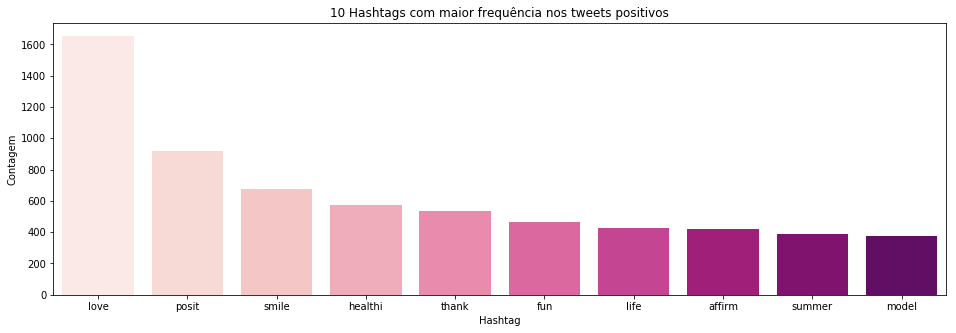

In [0]:
import seaborn as sns

# selecionando as 10 hts com maior freq  

top_10_regulares = df_frequencia_hts_regulares.nlargest(columns="Contagem", n=10)
top_10_complicados = df_frequencia_hts_complicados.nlargest(columns='Contagem', n=10)

plt.figure(figsize=(16,5))
plt.title('10 Hashtags com maior frequência nos tweets positivos')
ax = sns.barplot(data=top_10_regulares, x="Hashtag", y ="Contagem", palette='RdPu')
ax.set(ylabel='Contagem')
plt.show()

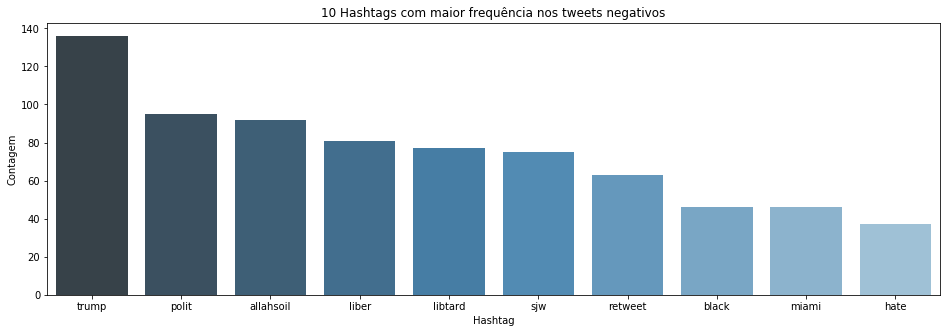

In [0]:
plt.figure(figsize=(16,5))
plt.title('10 Hashtags com maior frequência nos tweets negativos')
ax = sns.barplot(data=top_10_complicados, x="Hashtag", y ="Contagem", palette="Blues_d")
ax.set(ylabel='Contagem')
plt.show()

Repare que já podemos entender vieses, o que é neutro e o que é positivo para nós com esses gráficos.

# Fazendo previsões com tweets

Agora podemos usar esses tweets para fazer um modelo que vai saber dizer o que é positivo ou negativo em outros tweets.

Para isso como vamos fazer que a máquina que entende números entenda as nossas palavras? Convertendo-as em sequencias lineares de numeros ou vetorizando. Um jeito de fazer isso é fazendo um 'saco de palavras' ou bag of words, BOW.

## Convertendo texto em vetor usando BOW

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
# max_df significa que se a palavra estiver em 90% dos documentos, vamos ignora-la.  
# min_df significa que se estiver em apenas 2 documentos, também.
vetorizador_bow = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')

bow = vetorizador_bow.fit_transform(dados['tidy_tweet'])

In [0]:
bow

<49159x14664 sparse matrix of type '<class 'numpy.int64'>'
	with 284135 stored elements in Compressed Sparse Row format>

Show, agora temos vetores de frequencias de palavras. 

Vamos criar o nosso classificador. Vamos fazer uma regressão logística para prever o sentimento de novos tweets.

## Criando e treinando o clf

Dividindo entre treino e teste.

In [0]:
# Dividindo os dados em treino e teste novamente
from sklearn.model_selection import train_test_split

treino_bow = bow[:31962,:]
teste_bow = bow[31962:,:]

x_treino_bow, x_validacao_bow, y_treino, y_validacao = train_test_split(treino_bow, tweets_treino['label'], random_state=42, test_size=0.3)

Criando o classificador.

In [0]:
from sklearn.linear_model import LogisticRegression

clf_regressao_logistica = LogisticRegression()

Treinando o modelo.

In [0]:
clf_regressao_logistica.fit(x_treino_bow, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Fazendo as predições para o conjunto de validação.

## Prevendo para validação

In [0]:
predicoes_bow = clf_regressao_logistica.predict(x_validacao_bow)

In [0]:
predicoes_bow[:3]

array([0, 0, 0])

In [0]:
y_validacao[:3]

12227    0
14709    0
19319    0
Name: label, dtype: int64

Além de usar o predict, podemos também saber qual foi a estimativa da regressão para cada uma das classificacoes, 0 ou 1. Fazemos isso chamando o predict_proba.

In [0]:
predicoes_bow_proba = clf_regressao_logistica.predict_proba(x_validacao_bow)
predicoes_bow_proba

array([[0.99897645, 0.00102355],
       [0.9888869 , 0.0111131 ],
       [0.94138426, 0.05861574],
       ...,
       [0.96405973, 0.03594027],
       [0.4528234 , 0.5471766 ],
       [0.98261619, 0.01738381]])

In [0]:
#mantendo apenas a segunda coluna
predicoes_bow_proba[:,1]

array([0.00102355, 0.0111131 , 0.05861574, ..., 0.03594027, 0.5471766 ,
       0.01738381])

In [0]:
from sklearn.metrics import f1_score

f1_score(y_validacao, predicoes_bow)

0.6165273909006499

In [0]:
f1_score(y_validacao, predicoes_bow_proba)

ValueError: ignored

Vamos arrumar nossas predições para calcular o f1. Se a probabilidade for igual a 0.3 ou maior, vai ser negativo, senão, vai ser positivo.

In [0]:
# com [:,1] pegamos apenas a coluna com os valores das predições
predicoes_transformadas = predicoes_bow_proba[:,1] >= 0.3

In [0]:
predicoes_transformadas

array([False, False, False, ..., False,  True, False])

Repare que ao colocarmos uma condição, nossos valores contínuos viraram booleanos, agora basta converte-los para inteiros.

In [0]:
predicoes_int = predicoes_transformadas.astype(np.int)
# algumas pessoas chamam teste de validação, outras dividem em treino, teste e validação
f1_score(y_validacao, predicoes_int) 

0.6628383921246923

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_validacao, predicoes_int))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8905
           1       0.76      0.59      0.66       684

    accuracy                           0.96      9589
   macro avg       0.86      0.79      0.82      9589
weighted avg       0.95      0.96      0.95      9589



Fazendo predições para teste.

In [0]:
predicoes_teste = clf_regressao_logistica.predict_proba(teste_bow)

predicoes_teste_int = predicoes_teste[:,1] >= 0.3
predicoes_teste_int = predicoes_teste_int.astype(np.int)

tweets_teste['label'] = predicoes_teste_int

resultados = tweets_teste[['id','label']]

In [0]:
resultados.head(5)

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


Vamos salvar os resultados em um csv

In [0]:
resultados.to_csv('resultados_reg_log_bow.csv', index=False)

In [0]:
tweets_teste.head(35)

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
5,31968,choose to be :) #momtips,0
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,0
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,0
8,31971,@user @user @user i will never understand why...,0
9,31972,#delicious #food #lovelife #capetown mannaep...,0


## Salvando o modelo

In [0]:
import pickle

nome_arquivo = 'modelo_reg_log_tweets.pkl'
pickle.dump(clf_regressao_logistica, open(nome_arquivo, 'wb'))

Vendo se ele funciona.

In [0]:
modelo_carregado = pickle.load(open(nome_arquivo, 'rb'))
acuracia = modelo_carregado.score(x_validacao_bow, y_validacao)

In [0]:
acuracia

0.9569298154134946